In [1]:
import pandas as pd
import plotly.express as px

In [2]:
df = pd.read_csv('/content/drive/My Drive/courses/data analytics basics/datasets/Social_Network_Ads.csv')

In [3]:
fig = px.scatter(data_frame=df, x = 'Age', y='EstimatedSalary',color='Purchased')
fig.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [5]:
X =  df[['Age','EstimatedSalary']]
y = df['Purchased']

In [6]:
scaler = StandardScaler()
scaledX = scaler.fit_transform(X)

In [10]:
trainX,testX, trainY,testY = train_test_split(scaledX,y,test_size=.2, random_state=0)
clf = GaussianNB()
clf.fit(trainX,trainY)

GaussianNB(priors=None, var_smoothing=1e-09)

In [11]:
ypred = clf.predict(testX)
confusion_matrix(testY, ypred)

array([[55,  3],
       [ 4, 18]])

In [12]:
ypredfull = clf.predict(scaledX)
confusion_matrix(y, ypredfull)

array([[238,  19],
       [ 25, 118]])

In [13]:
clf.score(testX,testY) * 100

91.25

In [14]:
df['predictions'] = ypredfull

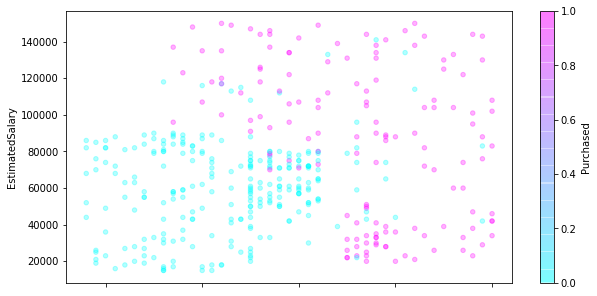

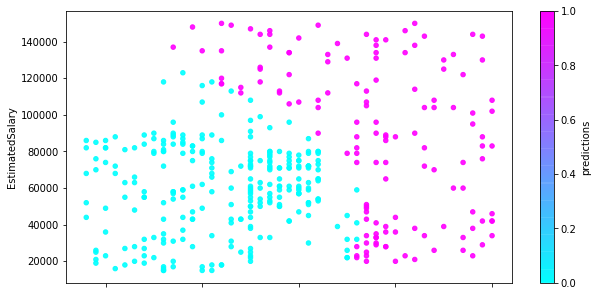

In [15]:
df.plot.scatter(x='Age',y='EstimatedSalary',c='Purchased',figsize=(10,5),alpha=.3,cmap='cool')
df.plot.scatter(x='Age',y='EstimatedSalary',c='predictions',figsize=(10,5),alpha=.9,cmap='cool')